# **Download and Import Libraries**

In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from google.colab import files
from sklearn.model_selection import train_test_split

# **Downlaod and Read The Data**

In [ ]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c contradictory-my-dear-watson

In [ ]:
!unzip contradictory-my-dear-watson

Archive:  contradictory-my-dear-watson.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# **EDA**

In [ ]:
train.shape

(12120, 6)

In [ ]:
train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.3+ KB


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,12120.0,0.990759,0.824523,0.0,0.0,1.0,2.0,2.0


In [ ]:
test.shape

(5195, 5)

In [ ]:
test.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5195 non-null   object
 1   premise     5195 non-null   object
 2   hypothesis  5195 non-null   object
 3   lang_abv    5195 non-null   object
 4   language    5195 non-null   object
dtypes: object(5)
memory usage: 203.1+ KB


<ipython-input-14-955003df592b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train, palette= 'viridis')


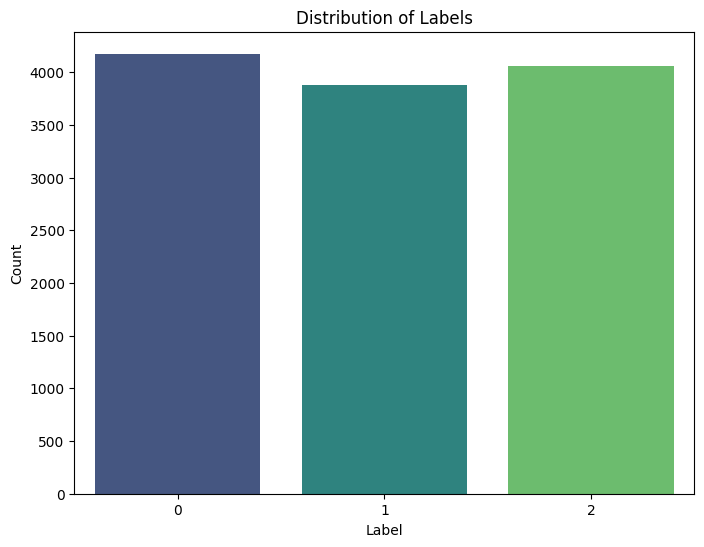

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train, palette= 'viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
train['label'].value_counts()

,count
label,
0,4176
2,4064
1,3880


<ipython-input-16-7b54ca686829>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lang_abv', data=train, palette= 'viridis')


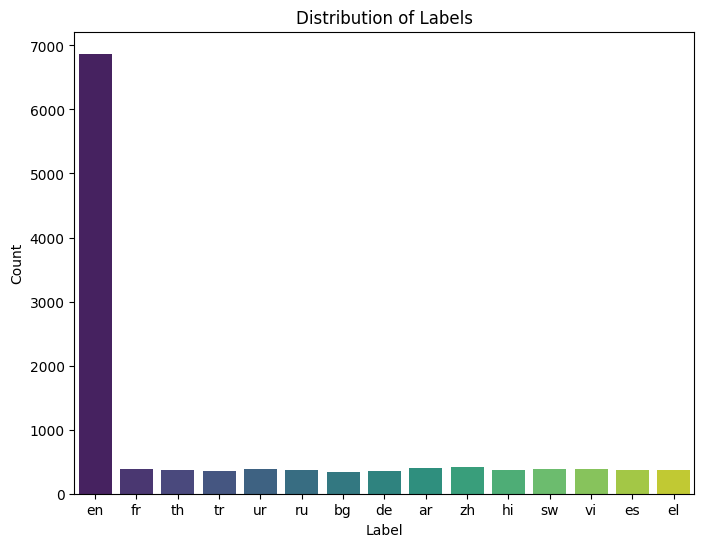

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='lang_abv', data=train, palette= 'viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
train['lang_abv'].value_counts()

,count
lang_abv,
en,6870
zh,411
ar,401
fr,390
sw,385
ur,381
vi,379
ru,376
hi,374


In [ ]:
def display_pair_of_sentence(x):
    print( "Premise : " + x['premise'])
    print( "Hypothesis: " + x['hypothesis'])
    print( "Language: " + x['language'])
    print( "Label: " + str(x['label']))
    print()

train.head(10).apply(lambda x : display_pair_of_sentence(x), axis=1)
train.shape

Premise : and these comments were considered in formulating the interim rules.
Hypothesis: The rules developed in the interim were put together with these comments in mind.
Language: English
Label: 0

Premise : These are issues that we wrestle with in practice groups of law firms, she said. 
Hypothesis: Practice groups are not permitted to work on these issues.
Language: English
Label: 2

Premise : Des petites choses comme celles-là font une différence énorme dans ce que j'essaye de faire.
Hypothesis: J'essayais d'accomplir quelque chose.
Language: French
Label: 0

Premise : you know they can't really defend themselves like somebody grown uh say my age you know yeah
Hypothesis: They can't defend themselves because of their age.
Language: English
Label: 0

Premise : ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสดงออกและได้เล่นหลายบทบาทไปพร้อมกัน ๆ อาจช่วยให้เด็กจับความคล้ายคลึงและความแตกต่างระหว่างผู้คนในด้านความปรารถนา ความเชื่อ และความรู้สึกได้
Hypothesis: เด็กสามารถเห็นได้ว่าชาติพันธุ

(12120, 6)

# **Preprocessing**

In [ ]:
train["premise_length"] = train["premise"].apply(lambda x : len(x))
train["hypothesis_length"] = train["hypothesis"].apply(lambda x : len(x))
train[["hypothesis_length", "premise_length"]].describe().T

,count,mean,std,min,25%,50%,75%,max
hypothesis_length,12120.0,53.892327,25.302358,4.0,36.0,51.0,67.0,276.0
premise_length,12120.0,107.373185,71.089954,4.0,55.0,96.0,146.0,967.0


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('joeddav/xlm-roberta-large-xnli')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
encoded = tokenizer(train['premise'].tolist(), train['hypothesis'].tolist(), padding='max_length', return_tensors='tf')

# **Modelling**

In [ ]:
# Define and initialize the distribution strategy
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Define the input layers
    input_ids = tf.keras.Input(shape=(512,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.Input(shape=(512,), dtype=tf.int32, name='attention_mask')

    # Load the RoBERTa model
    roberta_model = TFAutoModel.from_pretrained('joeddav/xlm-roberta-large-xnli')

    # Define a custom layer to wrap the Hugging Face model
    class RobertaLayer(tf.keras.layers.Layer):
        def __init__(self, roberta_model):
            super(RobertaLayer, self).__init__()
            self.roberta = roberta_model

        def call(self, inputs):
            input_ids, attention_mask = inputs
            outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
            return outputs[0]  # Return the sequence output (last hidden state)

    # Apply the custom layer
    roberta_output = RobertaLayer(roberta_model)([input_ids, attention_mask])

    # Add pooling and dense layers
    output = tf.keras.layers.GlobalAveragePooling1D()(roberta_output)
    output = tf.keras.layers.Dense(3, activation='softmax')(output)

    # Build the model
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Display the model summary
    model.summary()

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ roberta_layer       │ (None, 512, 1024) │          0 │ input_ids[0][0],  │
│ (RobertaLayer)      │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ roberta_layer[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │      3,075 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.fit(encoded.data, tf.convert_to_tensor(train.label),
          validation_split=0.2,
          epochs=3,
          batch_size=8*strategy.num_replicas_in_sync,
          callbacks=[early_stop],
          verbose=1)

Epoch 1/3
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 1379s 1s/step - accuracy: 0.4858 - loss: 1.1709 - val_accuracy: 0.8936 - val_loss: 0.3279
Epoch 2/3
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 1371s 1s/step - accuracy: 0.9097 - loss: 0.2754 - val_accuracy: 0.9113 - val_loss: 0.2707
Epoch 3/3
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 1371s 1s/step - accuracy: 0.9269 - loss: 0.2229 - val_accuracy: 0.9134 - val_loss: 0.2634


379/379 ━━━━━━━━━━━━━━━━━━━━ 1374s 4s/step


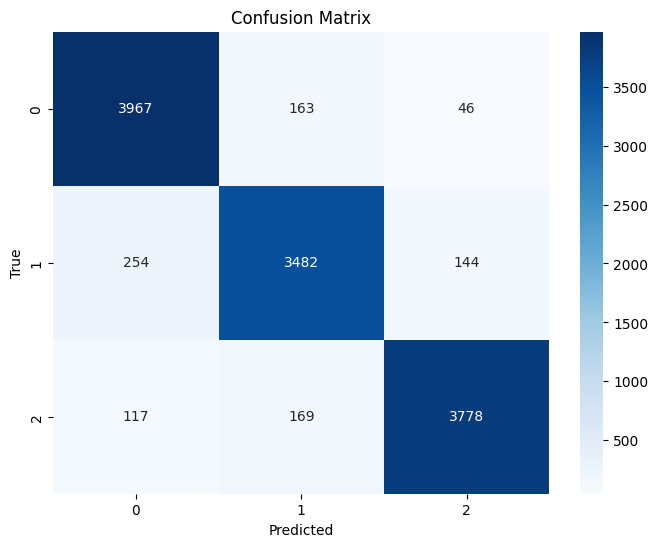

In [ ]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
y_pred = np.argmax(model.predict(encoded.data), axis=1) # Get predicted labels from model output
y_true = train.label  # Assuming 'train.label' contains the true labels

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# **Submet**

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
sample_submission.head()

,id,prediction
0,c6d58c3f69,1
1,cefcc82292,1
2,e98005252c,1
3,58518c10ba,1
4,c32b0d16df,1


In [ ]:
# prompt: i want to submet to kaggle comp

encoded_test = tokenizer(test['premise'].tolist(), test['hypothesis'].tolist(), padding='max_length', return_tensors='tf')

predictions = model.predict(encoded_test.data)
predicted_labels = np.argmax(predictions, axis=1)

sample_submission['prediction'] = predicted_labels
sample_submission.to_csv('submission.csv', index=False)

!kaggle competitions submit -c contradictory-my-dear-watson -f submission.csv -m "My submission message"


163/163 ━━━━━━━━━━━━━━━━━━━━ 597s 4s/step
100% 66.0k/66.0k [00:00<00:00, 108kB/s]
400 Client Error: Bad Request for url: https://www.kaggle.com/api/v1/competitions/submissions/submit/contradictory-my-dear-watson
